# Regressionsanalyse Powerlifting 

## Libraries

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

## Data

In [2]:
rawdata = pd.read_csv("Data_combined.csv")
rawdata.head()
#rawdata.describe()
#rawdata.select_dtypes(include='object').describe()


,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
0,19391.0,Carlos Ceron,M,Raw,23.0,87.30,205.0,235.0,125.0
1,15978.0,Tito Herrera,M,Wraps,23.0,73.48,220.0,260.0,157.5
2,27209.0,Levi Lehman,M,Raw,26.0,112.40,142.5,220.0,145.0
3,27496.0,Stacy Hayford,F,Raw,35.0,59.42,95.0,102.5,60.0
4,20293.0,Brittany Hirt,F,Raw,26.5,61.40,105.0,127.5,60.0


### Visualisierung der Daten

In [3]:
# Anzahl der Einträge ausgeben
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries)

# Eindeutige Kategorien ausgeben
unique_categories = rawdata["Equipment"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Überprüfen ob Diverse Geschlechter inkludiert sind
unique_categories = rawdata["Sex"].unique()
print("Kategorien in der Spalte von Eqipment:", unique_categories)  

# Altersspanne berechnen
print("Altersspanne der Teilnehmer:", rawdata["Age"].min(), "-", rawdata["Age"].max())

# Altersspanne berechnen
print("Körpergewicht der Teilnehmer:", rawdata["BodyweightKg"].min(), "-", rawdata["BodyweightKg"].max())

# Zähle die Anzahl der Männer und Frauen
count_men = (rawdata['Sex'] == 'M').sum()
count_women = (rawdata['Sex'] == 'F').sum()

# Berechne den Prozentsatz von Männern und Frauen
percentage_men = (count_men / len(rawdata)) * 100
percentage_women = (count_women / len(rawdata)) * 100
print(round(percentage_men, 2), "% der Teilnehmer sind männlich und", round(percentage_women, 2), "% der Teilnehmer sind weiblich")


Anzahl der Einträge in Rawdata: 18900
Kategorien in der Spalte von Eqipment: ['Raw' 'Wraps' 'Single-ply' 'Multi-ply']
Kategorien in der Spalte von Eqipment: ['M' 'F']
Altersspanne der Teilnehmer: 7.0 - 83.0
Körpergewicht der Teilnehmer: 26.13 - 201.0
67.57 % der Teilnehmer sind männlich und 32.43 % der Teilnehmer sind weiblich


Erläuterung des Equipments:<br>
__Raw__ = Powerlifter verwenden kein Equipment<br>__Wraps__ = Athleten verwenden spezielle Bandagen für zusätzliche Stabilität an Knie oder Handgelenken <br>__Single-ply__ = Athleten tragen vollständige Ausrüstung, jedoch ist jede Schicht auf eine begrenzt.<br>__Multi-ply__ = Athleten tragen vollständige Ausrüstung mit mehreren erlaubten Schichten für maximale Unterstützung.



## Datenverarbeitung

### Fehlende Werte

In [4]:
# Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")

# Da weniger als 1% der Daten unvollstänidg sind = Zeilen löschen
rawdata = rawdata.dropna(axis=0)

# Wiederholtes Überprüfen auf fehlende Werte
print(rawdata.isnull().sum())
num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")


playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
BestBenchKg         0
dtype: int64
Anzahl der Einträge in Rawdata: 18900 

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
BestBenchKg       0
dtype: int64
Anzahl der Einträge in Rawdata: 18725 



### Sonderfall BestSquatKg

In [5]:
rawdata.select_dtypes(include='object').describe()

,Name,Sex,Equipment,BestSquatKg
count,18725,18725,18725,18725
unique,15758,2,4,624
top,Scott Layman,M,Raw,182.5
freq,8,12643,12167,362


Uns ist aufgefallen, dass es sich bei BestSquatKg um einen String handelt, obwohl es bei einer Kilogramm zahl ein Float oder Integer sein müsste. Deshalb muss diese Spalte vorab angepasst werden.

In [6]:

# Identifizierung der Einträge mit nicht-numerischen Werten in "BestSquatKg"
# !!!!coerce erläutern...!!!!
non_numeric_entries = pd.to_numeric(rawdata['BestSquatKg'], errors='coerce').isna()

# Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")

## Einige Werte wurden mit einem Punkt zu viel gespeichert, also ersetzen wir diese 
## Werte mit nur einem Punkt um Float-Werte zu erhalten

# Korrektur der fehlerhaften Einträge
rawdata['BestSquatKg'] = rawdata['BestSquatKg'].str.replace('..', '.', regex=False)

# Konvertierung der korrigierten Spalte in einen numerischen Typ
rawdata['BestSquatKg'] = pd.to_numeric(rawdata['BestSquatKg'])

# Ausgabe der fehlerhaften Einträge
print(rawdata[non_numeric_entries][['playerId', 'BestSquatKg']],"\n")





       playerId BestSquatKg
94      11462.0      102..5
1614    21517.0      227..5
1663    12116.0      133..0
1720    28706.0      192..5
1766    23256.0      105..0
2590    12648.0      195..0
2803    20917.0      237..5
4213     1659.0      122..5
9712    24353.0      295..0
12138   17751.0      180..0
12429   16459.0      205..0
12445   14456.0      110..0
12664   13558.0      220..0
16998     545.0      145..0
18527    5539.0      207..5 

       playerId  BestSquatKg
94      11462.0        102.5
1614    21517.0        227.5
1663    12116.0        133.0
1720    28706.0        192.5
1766    23256.0        105.0
2590    12648.0        195.0
2803    20917.0        237.5
4213     1659.0        122.5
9712    24353.0        295.0
12138   17751.0        180.0
12429   16459.0        205.0
12445   14456.0        110.0
12664   13558.0        220.0
16998     545.0        145.0
18527    5539.0        207.5 



In [7]:
## Entfernen der negativen Werte

# Zählen der negativen Werte
count_of_negative_rows = (rawdata['BestSquatKg'] < 0).sum()
print("Anzahl der Zeilen mit negativen Werten in 'BestSquatKg':", count_of_negative_rows)

num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")

# Entfernen der Zeilen mit negativen Werten in "BestSquatKg"
rawdata = rawdata[rawdata['BestSquatKg'] >= 0]

# Überprüfung 
count_of_negative_rows_updated = (rawdata['BestSquatKg'] < 0).sum()
print("Anzahl der Zeilen mit negativen Werten in 'BestSquatKg' nach Anpassung:", count_of_negative_rows_updated)

num_entries = rawdata.shape[0]
print("Anzahl der Einträge in Rawdata:", num_entries, "\n")

## Unser erster Ansatz war es die negativen Werte in positive umzuwandeln, indem wir diese in absolute Zahlen transformieren.
## Da es sich jedoch nur um 82 Werte handelt, habe wir entschieden diese zu entfernen.


Anzahl der Zeilen mit negativen Werten in 'BestSquatKg': 82
Anzahl der Einträge in Rawdata: 18725 

Anzahl der Zeilen mit negativen Werten in 'BestSquatKg' nach Anpassung: 0
Anzahl der Einträge in Rawdata: 18643 



### Außreißer

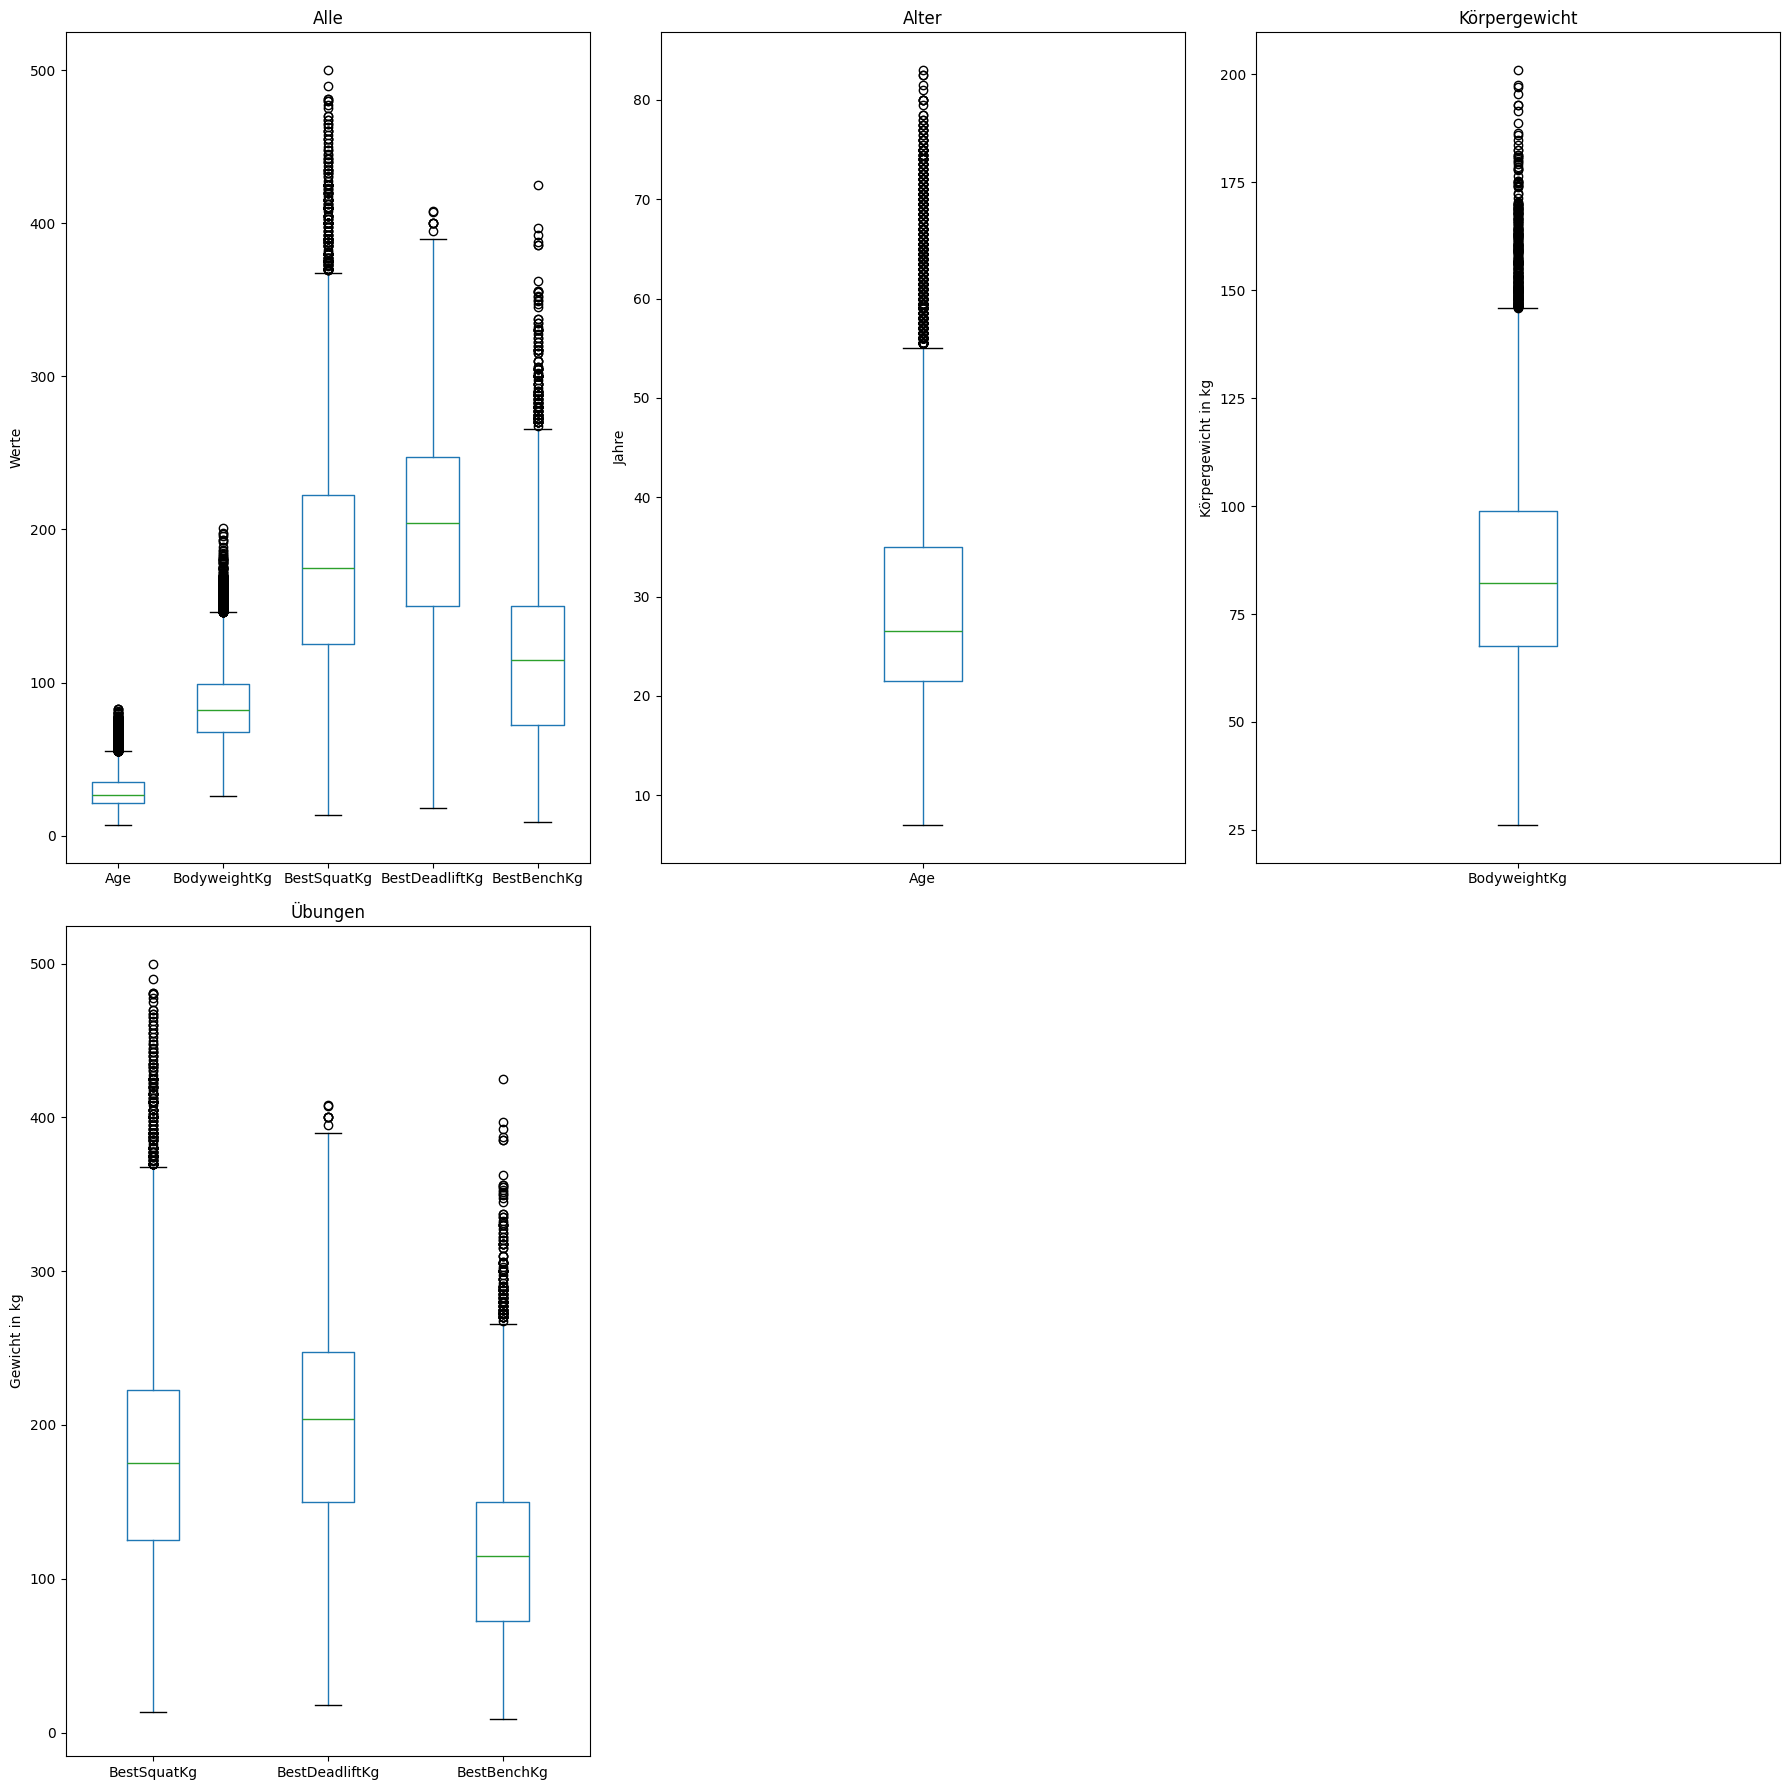

'\nsns.set_style("whitegrid")\nsns.boxplot(data=rawdata[\'Age\'])\n'

In [8]:
## Visualisieren der Ausreißer

# Formatierung
plt.figure(figsize=(18, 18)) 

# Subplot = Alle
plt.subplot(2, 3, 1)
rawdata.drop(columns=['playerId']).boxplot(grid=False)
plt.ylabel('Werte')
plt.title('Alle')

# Subplot = Alter
plt.subplot(2, 3, 2)
rawdata.boxplot(column=['Age'], grid=False)
plt.ylabel('Jahre')
plt.title('Alter')

# Subplot = Körpergewicht
plt.subplot(2, 3, 3)
rawdata.boxplot(column=['BodyweightKg'], grid=False)
plt.ylabel('Körpergewicht in kg')
plt.title('Körpergewicht')

# Subplot = Übungen
plt.subplot(2, 3, 4)
rawdata.boxplot(column=['BestSquatKg', 'BestDeadliftKg', 'BestBenchKg'], grid=False)
plt.ylabel('Gewicht in kg')
plt.title('Übungen')

# Ausgabe
plt.tight_layout()
plt.show()

"""
sns.set_style("whitegrid")
sns.boxplot(data=rawdata['Age'])
"""

In [9]:
## Umgang mit Außreißer

# Festlegen der Interquantile
Q1 = rawdata['BestDeadliftKg'].quantile(q=0.25, interpolation='midpoint') # Q1 = np.percentile(rawdata['PRICE'], q=25, method='midpoint')
Q3 = rawdata['BestDeadliftKg'].quantile(q=0.75, interpolation='midpoint') # Q3 = np.percentile(rawdata['PRICE'], q=75, method='midpoint')
IQR = Q3 - Q1
print('Interquartile range: ', round(IQR, 2))

# Upper bound
upper_bound = Q3 + 1.5 * IQR
upper= np.array(rawdata['BestDeadliftKg'] > upper_bound)
print('Sum of upper values: ', upper.sum())
# Lower bound
lower_bound = Q1 - 1.5 * IQR
lower = np.array(rawdata['BestDeadliftKg'] < lower_bound)
print('Sum of lower values: ', lower.sum())

# Setting outliers to boundaries
rawdata.loc[rawdata['BestDeadliftKg'] > upper_bound, 'BestDeadliftKg'] = upper_bound
rawdata.loc[rawdata['BestDeadliftKg'] < lower_bound, 'BestDeadliftKg'] = lower_bound

Interquartile range:  97.81
Sum of upper values:  7
Sum of lower values:  0


### Dummifizierung

In [10]:
# Anpassen der Spalte Equipment
rawdata = pd.get_dummies(rawdata, columns=["Equipment"])
rawdata = pd.get_dummies(rawdata, columns=["Sex"])

# Ausgabe
#rawdata.sample(5)
rawdata[['Equipment_Raw', 'Equipment_Wraps', 'Equipment_Single-ply', 'Equipment_Multi-ply', 'Sex_M', 'Sex_F']].head()

,Equipment_Raw,Equipment_Wraps,Equipment_Single-ply,Equipment_Multi-ply,Sex_M,Sex_F
0,True,False,False,False,True,False
1,False,True,False,False,True,False
2,True,False,False,False,True,False
3,True,False,False,False,False,True
4,True,False,False,False,False,True


### Aufteilen in Trainingssets

In [11]:
# Entfernen der unwichtigen Variablen
rawdata.drop(columns=['Name', 'playerId'], inplace=True)

# Convert data frame into numpy array and then split array into train and test arrays
train, test = train_test_split(rawdata.to_numpy(), shuffle=True)

### Formatierung der Trainingssets

In [12]:

# Extract X and y
train_X, train_y = train[:, 1:], train[:, 0].reshape(-1, 1)
test_X, test_y = test[:, 1:], test[:, 0].reshape(-1, 1)

# Fit a scaler on the training set and distinguish between X and y fits for later inverse transformations
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
train_scaled_X = scaler_X.fit_transform(train_X)
train_scaled_y = scaler_y.fit_transform(train_y)
# Apply the same scalers with learned parameters from training set on test set
test_scaled_X = scaler_X.transform(test_X)
test_scaled_y = scaler_y.transform(test_y)

## Neural Network Model
### Definition of the model architecture

In [13]:
# Input layer
# Therefor the number of input units (aka features) is needed
input = Input(shape=(train_scaled_X.shape[1],))
# Hidden layers
hidden = Dense(units=128, activation='relu')(input) # Note: The last parentheses include the input for the callable mechanism (an instance of a class can be directly used like a function)
hidden = Dense(units=64, activation='relu')(hidden)
hidden = Dense(units=32, activation='relu')(hidden)
hidden = Dense(units=16, activation='relu')(hidden)
# Output layer
output = Dense(units=train_scaled_y.shape[1], activation='linear')(hidden)

# Compose entire model
model = Model(inputs=input, outputs=output, name='Regression')

# Summarize layers
print(model.summary())

Model: "Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Configuration of the training process
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model.fit(x=train_scaled_X, y=train_scaled_y, epochs=5, batch_size=1)

Epoch 1/5


13982/13982 ━━━━━━━━━━━━━━━━━━━━ 8s 490us/step - loss: 0.0241 - root_mean_squared_error: 0.1552
Epoch 2/5
13982/13982 ━━━━━━━━━━━━━━━━━━━━ 7s 485us/step - loss: 0.0227 - root_mean_squared_error: 0.1507
Epoch 3/5
13982/13982 ━━━━━━━━━━━━━━━━━━━━ 7s 486us/step - loss: 0.0227 - root_mean_squared_error: 0.1506
Epoch 4/5
13982/13982 ━━━━━━━━━━━━━━━━━━━━ 7s 494us/step - loss: 0.0219 - root_mean_squared_error: 0.1480
Epoch 5/5
13982/13982 ━━━━━━━━━━━━━━━━━━━━ 7s 493us/step - loss: 0.0214 - root_mean_squared_error: 0.1462


## Predictions
### Computations

In [15]:
# We define an own function for calculation of the root mean squared error
def rmse(actuals, preds):
    """Root mean squared error (RMSE)

    Arguments
    ---------
        actuals : vector-like, e.g. list, tupel, array
            A numeric vector with actual values.
        preds : vector-like, e.g. list, tupel, array
            A numeric vector with predicted values.

    Returns
    -------
       Root mean squared error : numpy.float
    """
    actuals, preds = np.array(actuals), np.array(preds)
    error = actuals - preds
    mse = np.mean(error**2)
    return np.sqrt(mse)

# In-sample and out-of-sample predictions
train_yhat = model.predict(train_scaled_X)
test_yhat = model.predict(test_scaled_X)
# Inverse transforming because of scaled values
train_rescaled_yhat = scaler_y.inverse_transform(train_yhat)
test_rescaled_yhat = scaler_y.inverse_transform(test_yhat)
# Compute RMSE
rmse_train = round(rmse(train_y, train_rescaled_yhat), 2)
rmse_test = round(rmse(test_y, test_rescaled_yhat), 2)
print("RMSE: Train = {0}, test = {1}".format(rmse_train, rmse_test))

  1/437 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
RMSE: Train = 11.06, test = 10.86


### Visualizations

C:\Users\lukib\AppData\Local\Temp\ipykernel_12752\2088272756.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


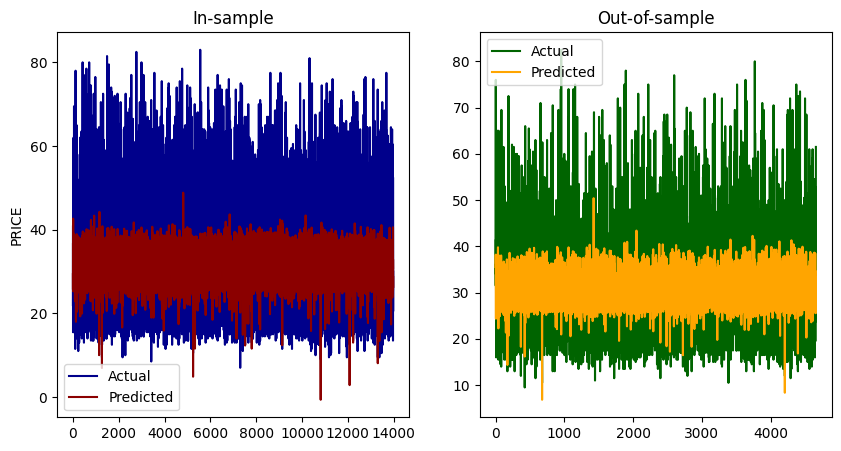

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# In-sample plot
axes[0].plot(train_y, label='Actual', linestyle='solid', color='darkblue')
axes[0].plot(train_rescaled_yhat, label='Predicted', linestyle='solid', color='darkred')
axes[0].set_title("In-sample")
axes[0].set_ylabel('PRICE')
axes[0].legend()
# Out-of-sample plot
axes[1].plot(test_y, label='Actual', linestyle='solid', color='darkgreen')
axes[1].plot(test_rescaled_yhat, label='Predicted', linestyle='solid', color='orange')
axes[1].set_title("Out-of-sample")
axes[1].legend()
fig.show()

## Quellen

- https://www.kaggle.com/datasets/kukuroo3/powerlifting-benchpress-weight-predict
- https://www.kaggle.com/code/yasseinmahmoud/eda-benchpress-weight
- https://chat.openai.com/
- https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet